# Use OSMnx to analyze a NetworkX street network, including routing
Author Liubov

Based on package: [Geoff Boeing](https://geoffboeing.com/)

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [3]:
!pip install geopandas

     |████████████████████████████████| 931kB 8.4MB/s 
     |████████████████████████████████| 10.9MB 22.7MB/s 
     |████████████████████████████████| 14.7MB 327kB/s 


In [4]:
!apt install python3-rtree


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 31 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 k

In [5]:

!pip install osmnx

     |████████████████████████████████| 81kB 5.1MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
  Created wheel for Rtree: filename=Rtree-0.9.4-cp36-none-any.whl size=21768 sha256=a40646d3ec3506a2ad22b4e465344d0312150676399a90732c09b25cdf460edb
  Stored in directory: /root/.cache/pip/wheels/ff/20/c5/0004ef7acb96745ec99be960053902b0b414a2aa2dcad5834e
Successfully built Rtree
  Found existing installation: Rtree 0.8.3
    Uninstalling Rtree-0.8.3:
      Successfully uninstalled Rtree-0.8.3


In [6]:
import matplotlib.cm as cm
import networkx as nx
import numpy as np
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.12.1'

## Calculate basic street network measures (topological and metric)

In [8]:
# get the network for Moscow, calculate its basic stats, then show the average circuity
stats = ox.basic_stats(ox.graph_from_place('Arbat, Moscow, Russia'))
stats['circuity_avg']



1.0725731138896888

In [0]:
# define a function 

def graph_streets(place):
  stats = ox.basic_stats(ox.graph_from_place(place))
  stats['circuity_avg']
  gdf = ox.gdf_from_place(place)
  area = ox.project_gdf(gdf).unary_union.area
  G = ox.graph_from_place(place, network_type='drive_service')
  stats = ox.basic_stats(G, area=area)
  extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
  for key, value in extended_stats.items():
    stats[key] = value
  pd.Series(stats)

  # projected image 
  G_projected = ox.project_graph(G)
  max_node, max_bc = max(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
  max_node, max_bc

  nc = ['r' if node==max_node else '#336699' for node in G_projected.nodes()]
  ns = [50 if node==max_node else 8 for node in G_projected.nodes()]
  fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color=nc, node_zorder=2)

  adj_matr = nx.adjacency_matrix(G)
  print(type(adj_matr))

  edg_list= nx.generate_edgelist(G)
  print(type(edg_list))
  edlist=[]
  for ed in nx.generate_edgelist(G, data=False):
    print(ed) 
    edlist.append(ed)

  print(edlist)
  print(type(edlist))

  dense_adj_matr = adj_matr.todense()
  print(np.shape(dense_adj_matr))

  np.savetxt('adj_matrix_streets.txt',dense_adj_matr)
  #np.savetxt('edges_streets.txt',edlist)

  return G 



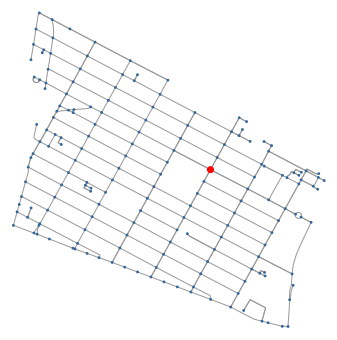

<class 'scipy.sparse.csr.csr_matrix'>
<class 'generator'>
42421828 42430942
42421828 42430938
42421837 4301088471
42421837 42421828
42423549 42451712
42428489 5357086126
42428489 42428483
42428491 42428489
42428493 42440721
42428493 42428491
42430872 42430886
42430872 42453104
42430886 3892037906
42430886 42449886
42430886 42449017
42430898 42430903
42430898 42442857
42430903 42454994
42430903 42430914
42430914 42430924
42430914 42449023
42430914 42454997
42430924 42455007
42430924 42449027
42430924 42430938
42430924 42430914
42430938 42449029
42430938 42421828
42430938 42455013
42430938 42430924
42430942 42421828
42430942 42449038
42430942 274342024
42430942 42446584
42430945 42444837
42430945 274342021
42434140 42434142
42434140 42443296
42434140 42434196
42434142 7490266268
42434142 42434201
42434148 42434215
42434148 42449023
42434196 4015190382
42434196 42434140
42434197 42443799
42434197 42434196
42434201 5481937338
42434201 42442851
42434205 7490266268
42434205 42434201
42434215

In [14]:
G_manh = graph_streets('East village, Manhattan, New York, NY, USA')

To calculate density-based metrics, you must also pass the network's bounding area in square meters (otherwise basic_stats() will just skip them in the calculation):

In [7]:
# get the street network for a place, and its area in square meters
place = 'Arbat, Moscow, Russia'
gdf = ox.gdf_from_place(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type='drive_service')

print('G type', type(G))

G type <class 'networkx.classes.multidigraph.MultiDiGraph'>


In [8]:
# calculate basic and extended network stats, merge them together, and display
stats = ox.basic_stats(G, area=area)
extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

n                                                                                   1083
m                                                                                   2042
k_avg                                                                            3.77101
intersection_count                                                                   732
streets_per_node_avg                                                              2.3795
streets_per_node_counts                        {0: 0, 1: 351, 2: 4, 3: 695, 4: 32, 5: 1}
streets_per_node_proportion            {0: 0.0, 1: 0.32409972299168976, 2: 0.00369344...
edge_length_total                                                                83497.7
edge_length_avg                                                                  40.8901
street_length_total                                                              53394.5
street_length_avg                                                                43.3046
street_segments_count

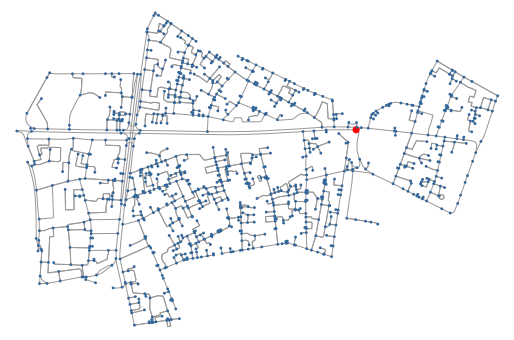

In [20]:
G_projected = ox.project_graph(G)
max_node, max_bc = max(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
max_node, max_bc

nc = ['r' if node==max_node else '#336699' for node in G_projected.nodes()]
ns = [50 if node==max_node else 8 for node in G_projected.nodes()]
fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color=nc, node_zorder=2)

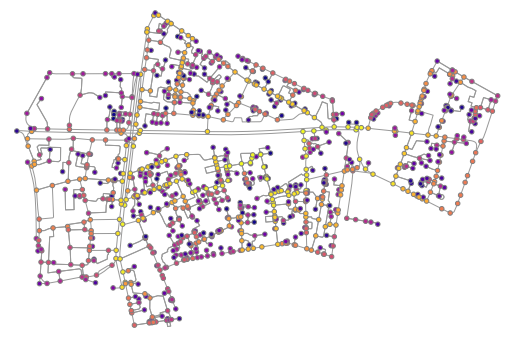

In [21]:
# get a color for each node
def get_color_list(n, color_map='plasma', start=0, end=1):
    return [cm.get_cmap(color_map)(x) for x in np.linspace(start, end, n)]

def get_node_colors_by_stat(G, data, start=0, end=1):
    df = pd.DataFrame(data=pd.Series(data).sort_values(), columns=['value'])
    df['colors'] = get_color_list(len(df), start=start, end=end)
    df = df.reindex(G.nodes())
    return df['colors'].tolist()

nc = get_node_colors_by_stat(G_projected, data=extended_stats['betweenness_centrality'])
fig, ax = ox.plot_graph(G_projected, node_color=nc, node_edgecolor='gray', node_size=20, node_zorder=2)

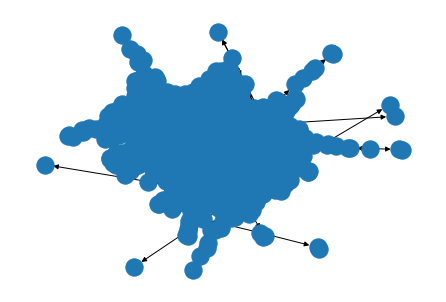

In [17]:
nx.draw(G)

In [29]:
# get adjacency matrix of graph 

import scipy as sp
import numpy as np
from google.colab import drive 
drive.mount("/drive")



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [31]:
import os
print( os.getcwd() )
#print( os.listdir('data') )

/content


In [46]:
from google.colab import files
    
adj_matr = nx.adjacency_matrix(G)
print(type(adj_matr))

edg_list= nx.generate_edgelist(G)
print(type(edg_list))
edlist=[]
for ed in nx.generate_edgelist(G, data=False):
     edlist.append(ed)

print(edlist)
print(type(edlist))

dense_adj_matr = adj_matr.todense()
print(np.shape(dense_adj_matr))

np.savetxt('adj_matrix_arbat_streets.txt',dense_adj_matr)
#np.savetxt('edges_arbat_streets.txt',edlist)


<class 'scipy.sparse.csr.csr_matrix'>
<class 'generator'>
['5416333314 5416333316', '5416333315 5416333316', '5416333316 5416333314', '5416333316 5416333315', '5416333316 5416333317', '5416333317 5416334428', '5416333317 5416333316', '4080201741 4080201745', '6389645327 3916712821', '4080201745 1777464538', '4080201745 4080201741', '335777823 315118575', '335777823 2810029913', '335777824 304772533', '335777824 2810029913', '335777824 1205687067', '2606624805 2606624807', '2606624807 253124537', '2606624807 2606624805', '2606624817 2606624822', '559198257 7004300451', '5220577333 5220577334', '5220577334 3130172282', '5220577334 5220577333', '5220577334 5220577338', '2606624822 2606624817', '2606624822 2606624807', '6389645365 5223559338', '6389645365 6389645372', '5220577338 3130172284', '5220577338 5220577334', '6389645372 6389645365', '271859779 3466483925', '271859779 2072704012', '3065913418 3379668915', '3065913418 5230216487', '3065913418 3065913420', '3065913420 3065913429', '3

Streets/intersection counts and proportions are nested dicts inside the stats dict. To convert these stats to a pandas dataframe (to compare/analyze multiple networks against each other), just unpack these nested dicts first:

In [0]:
# unpack dicts into individiual keys:values
stats = ox.basic_stats(G, area=area)
for k, count in stats['streets_per_node_counts'].items():
    stats['int_{}_count'.format(k)] = count
for k, proportion in stats['streets_per_node_proportion'].items():
    stats['int_{}_prop'.format(k)] = proportion

# delete the no longer needed dict elements
del stats['streets_per_node_counts']
del stats['streets_per_node_proportion']

# load as a pandas dataframe
pd.DataFrame(pd.Series(stats)).T

,n,m,k_avg,intersection_count,streets_per_node_avg,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count,...,int_4_count,int_5_count,int_6_count,int_0_prop,int_1_prop,int_2_prop,int_3_prop,int_4_prop,int_5_prop,int_6_prop
0,401.0,1048.0,5.226933,343.0,2.845387,118766.22,113.326546,62021.577,113.17806,548.0,...,49.0,2.0,1.0,0.0,0.144638,0.004988,0.720698,0.122195,0.004988,0.002494


### Inspect betweenness centrality

Above, the nodes are visualized by betweenness centrality, from low (dark violet) to high (light yellow).

## Routing: calculate the network path from the centermost node to some other node
Let the origin node be the node nearest the location and let the destination node just be the last node in the network. Then find the shortest path between origin and destination, using weight='length' to find the shortest spatial path (otherwise it treats each edge as weight=1).

In [0]:
# define a lat-long point, create network around point, define origin/destination nodes
location_point = (55.751495, 37.589945)
G_new = ox.graph_from_point(location_point, distance=500, distance_type='network', network_type='walk')
origin_node = ox.get_nearest_node(G_new, location_point)
destination_node = list(G_new.nodes())[-1]

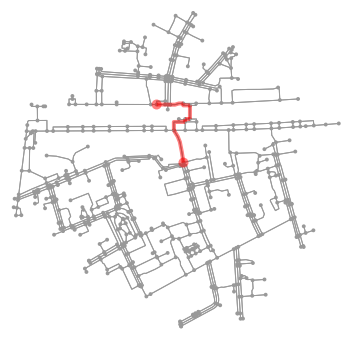

In [24]:
# find the route between these nodes then plot it
route = nx.shortest_path(G_new, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G_new, route)

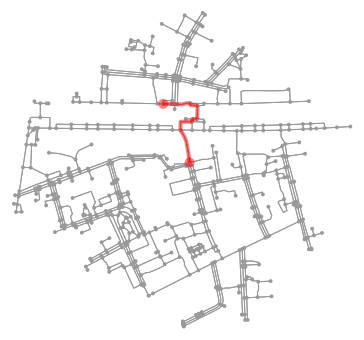

In [25]:
# project the network to UTM (zone calculated automatically) then plot the network/route again
G_proj = ox.project_graph(G_new)
fig, ax = ox.plot_graph_route(G_proj, route)

## Routing: plot network path from one lat-long to another

In [26]:
# define origin/desination points then get the nodes nearest to each
origin_point = (55.751495, 37.589945)
destination_point = (55.751455, 37.589755)
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)
origin_node, destination_node

(7233671585, 7233671585)

In [27]:
# find the shortest path between origin and destination nodes
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
str(route)

'[7233671585]'

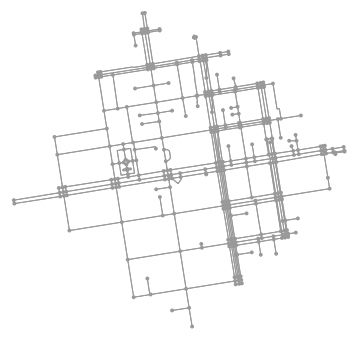

In [28]:
# plot the route showing origin/destination lat-long points in blue
fig, ax = ox.plot_graph_route(G, route, origin_point=origin_point, destination_point=destination_point)

## Demonstrate routing with one-way streets

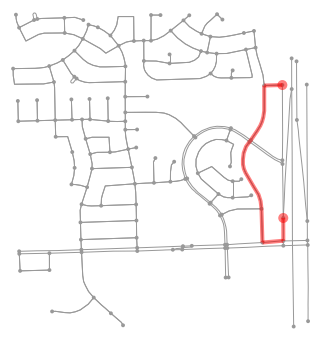

In [0]:
G = ox.graph_from_address('N. Sicily Pl., Chandler, Arizona', distance=800, network_type='drive')
origin = (33.307792, -111.894940)
destination = (33.312994, -111.894998)
origin_node = ox.get_nearest_node(G, origin)
destination_node = ox.get_nearest_node(G, destination)
route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G, route, save=True, filename='route')

#### Also, when there are parallel edges between nodes in the route, OSMnx picks the shortest edge to plot

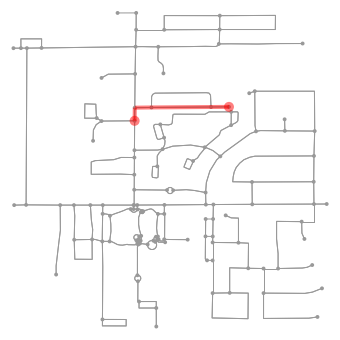

In [0]:
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, distance=500, clean_periphery=False)
origin = (33.301821, -111.829871)
destination = (33.301402, -111.833108)
origin_node = ox.get_nearest_node(G, origin)
destination_node = ox.get_nearest_node(G, destination)
route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G, route)